### Import knižníc

In [5]:
from sys import stdout
from PIL import Image

import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

### Zadefinovanie funkcie

In [6]:
def preprocessing(data_directory):
    images = glob.glob(data_directory + "*.png")
    classes = []
    filenames = []
    img_list = []
    for i, image in enumerate(images):
        filename = image.replace((data_directory),"")
        cat = filename.split('_')
        classes.append(cat[0])
        filenames.append(filename)
            
        img_list.append(np.array(Image.open(image).convert("L")))
        stdout.write("\r%d" % i + " z {}".format(len(images)))
        stdout.flush()

    df = pd.DataFrame({
            'filename': filenames,
            'class': classes
        })
    
    di = {"Negative": 0, "Positive": 1}
    df['class'] = df['class'].map(di)
    
    img_array = np.asarray(img_list, dtype=np.float32)
    img_array = img_array.reshape(img_array.shape[0], img_array.shape[1], img_array.shape[2], 1)
    stdout.write('\n')
    return img_array, df

### Nastavenie ciest k snímkam

In [7]:
DIR_PATH = '../FrantisekUrban/'
IMG_PATH = '../FrantisekUrban/zlucene/'
TRAIN_DIR = '../FrantisekUrban/zlucene/Train_images/'
TEST_DIR = '../FrantisekUrban/zlucene/Test_images/'
VALID_DIR = '../FrantisekUrban/zlucene/Valid_images/'

### Predspracovanie snímok

In [8]:
# predspracovanie
X_train, train_df = preprocessing(TRAIN_DIR)
X_test, test_df = preprocessing(TEST_DIR)
X_valid, valid_df = preprocessing(VALID_DIR)

# uloženie predspracovania
with open('train.pkl','wb') as f: pkl.dump([X_train, train_df], f)
with open('test.pkl','wb') as f: pkl.dump([X_test, test_df], f)
with open('valid.pkl','wb') as f: pkl.dump([X_valid, valid_df], f)

4667 z 4668
1190 z 1191
99 z 100


In [9]:
# načítanie predspracovaných dát
with open('train.pkl','rb') as f: X_train, train_df = pkl.load(f)
with open('test.pkl','rb') as f: X_test, test_df = pkl.load(f)
with open('valid.pkl','rb') as f: X_valid, valid_df = pkl.load(f)

y_train = train_df["class"]
y_test = test_df["class"]
y_valid = valid_df["class"]

In [10]:
print("TrainSetInto: {}".format(X_train.shape))
print("TestSetInto: {}".format(X_test.shape))
print("ValidSetInto: {}".format(X_valid.shape))

TrainSetInto: (4668, 299, 299, 1)
TestSetInto: (1191, 299, 299, 1)
ValidSetInto: (100, 299, 299, 1)


<AxesSubplot:>

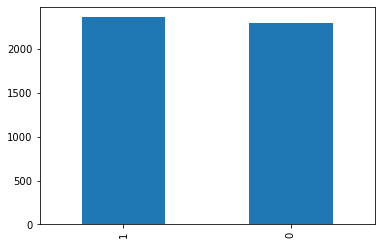

In [11]:
y_train.value_counts().plot.bar()

<AxesSubplot:>

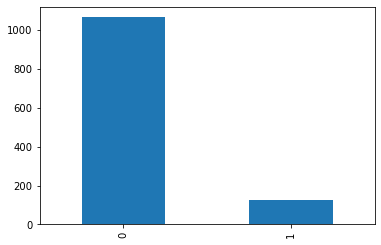

In [12]:
y_test.value_counts().plot.bar()

<AxesSubplot:>

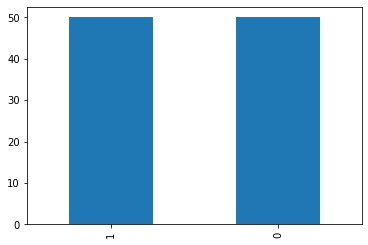

In [13]:
y_valid.value_counts().plot.bar()